In [71]:
import pandas as pd
import numpy as np 
import scipy as sp
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [72]:
import seaborn as sns # sns is an alias pointing to seaborn
sns.set(color_codes=True) #Set aesthetic parameters in one step. Remaps the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
from scipy import stats #Documentation stats package of scipy https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [308]:
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

# Data Read In

In [309]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)

In [310]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [311]:
from urllib.request import urlopen

label = urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names").read().decode('utf-8')

In [312]:
label = label.split("7. Attribute information")[1]
label = label.split("Several of the papers")[0]

In [313]:
print(label)



1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)




In [314]:
import re

label = re.findall(r'\)\s{1}\w+\s{1}',label)
for i in range(len(label)):
    label[i] = label[i].split(" ")[1]
    label[i] = label[i].strip()

In [315]:
label[-1] = label[-1] + "_dimension"
label[-3] = label[-3] + "_point"
print(label)

['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_point', 'symmetry', 'fractal_dimension']


In [316]:
label2 = [i + "SE" for i in label][2:]
label3 = ["Wrost" + i for i in label][2:]

In [317]:
label = label + label2 + label3
print(label)

['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_point', 'symmetry', 'fractal_dimension', 'radiusSE', 'textureSE', 'perimeterSE', 'areaSE', 'smoothnessSE', 'compactnessSE', 'concavitySE', 'concave_pointSE', 'symmetrySE', 'fractal_dimensionSE', 'Wrostradius', 'Wrosttexture', 'Wrostperimeter', 'Wrostarea', 'Wrostsmoothness', 'Wrostcompactness', 'Wrostconcavity', 'Wrostconcave_point', 'Wrostsymmetry', 'Wrostfractal_dimension']


In [318]:
df.columns = label

In [319]:
df.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_point,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointSE,symmetrySE,fractal_dimensionSE,Wrostradius,Wrosttexture,Wrostperimeter,Wrostarea,Wrostsmoothness,Wrostcompactness,Wrostconcavity,Wrostconcave_point,Wrostsymmetry,Wrostfractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [320]:
df.isnull().sum()

ID                        0
Diagnosis                 0
radius                    0
texture                   0
perimeter                 0
area                      0
smoothness                0
compactness               0
concavity                 0
concave_point             0
symmetry                  0
fractal_dimension         0
radiusSE                  0
textureSE                 0
perimeterSE               0
areaSE                    0
smoothnessSE              0
compactnessSE             0
concavitySE               0
concave_pointSE           0
symmetrySE                0
fractal_dimensionSE       0
Wrostradius               0
Wrosttexture              0
Wrostperimeter            0
Wrostarea                 0
Wrostsmoothness           0
Wrostcompactness          0
Wrostconcavity            0
Wrostconcave_point        0
Wrostsymmetry             0
Wrostfractal_dimension    0
dtype: int64

In [321]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Diagnosis = le.fit_transform(df.Diagnosis)
print(le.classes_)

['B' 'M']


In [322]:
df.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [323]:
pd.set_option('display.max_columns', None)
df.describe()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_point,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointSE,symmetrySE,fractal_dimensionSE,Wrostradius,Wrosttexture,Wrostperimeter,Wrostarea,Wrostsmoothness,Wrostcompactness,Wrostconcavity,Wrostconcave_point,Wrostsymmetry,Wrostfractal_dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [324]:
corr = df.iloc[:,1:].corr()
corr

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_point,symmetry,fractal_dimension,radiusSE,textureSE,perimeterSE,areaSE,smoothnessSE,compactnessSE,concavitySE,concave_pointSE,symmetrySE,fractal_dimensionSE,Wrostradius,Wrosttexture,Wrostperimeter,Wrostarea,Wrostsmoothness,Wrostcompactness,Wrostconcavity,Wrostconcave_point,Wrostsymmetry,Wrostfractal_dimension
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_point,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [325]:
import seaborn as sns

<AxesSubplot:>

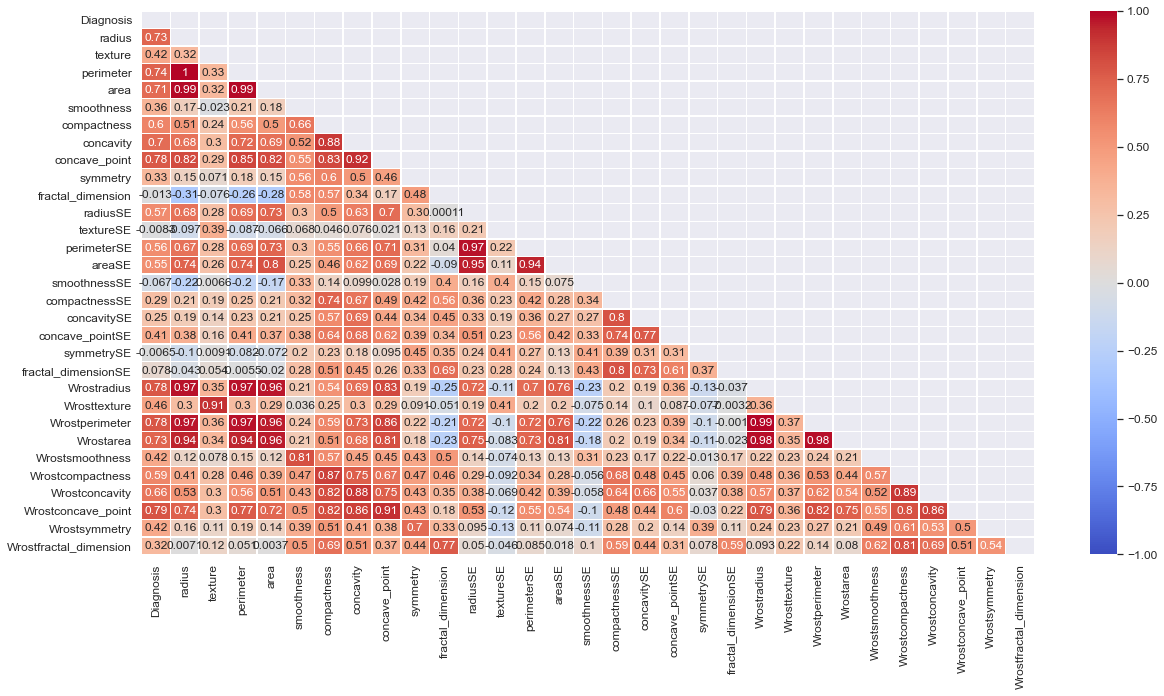

In [326]:
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(20,10)) 
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", annot=True, linewidths=0.5, mask = mask)

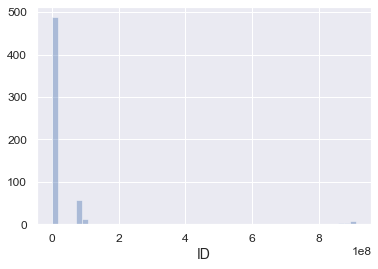

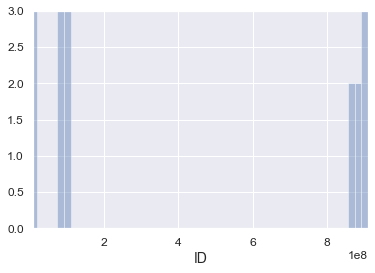

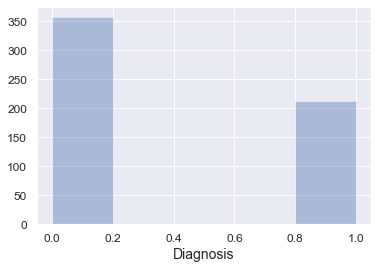

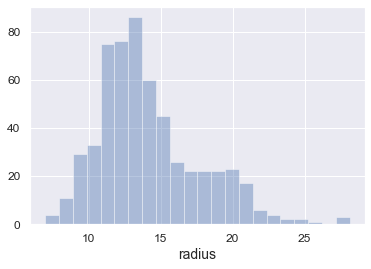

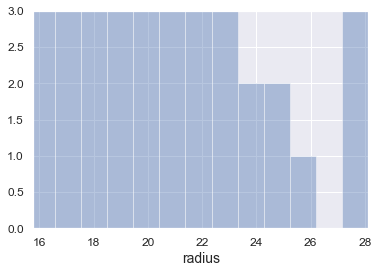

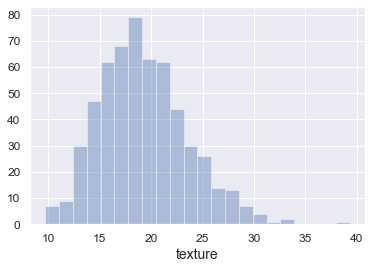

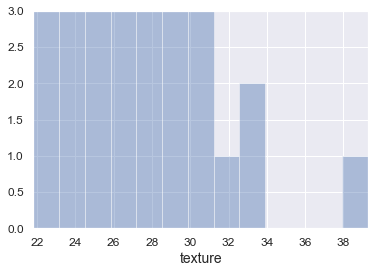

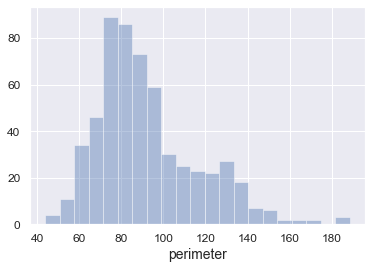

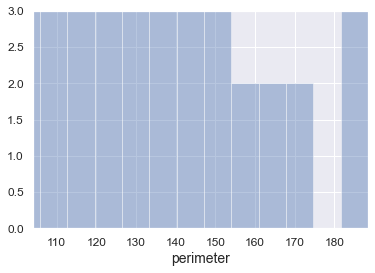

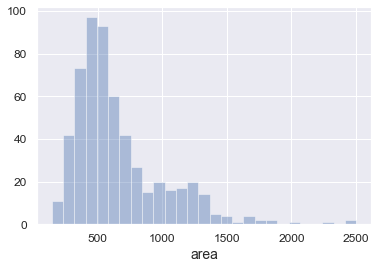

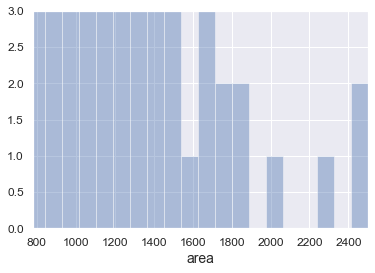

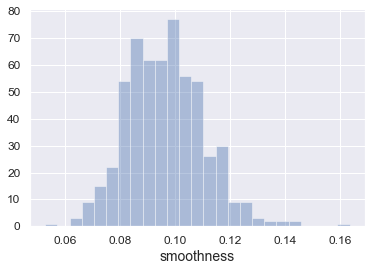

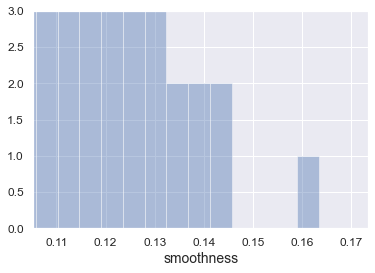

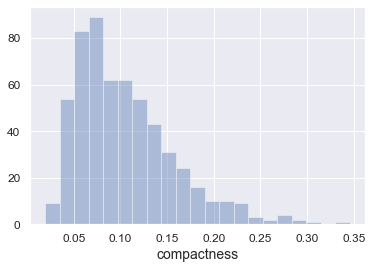

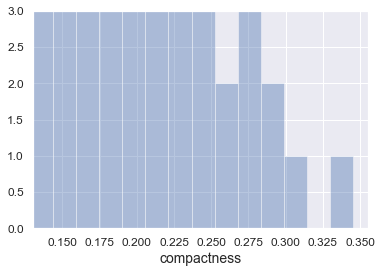

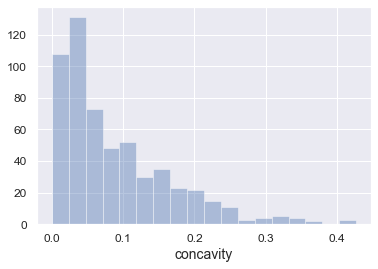

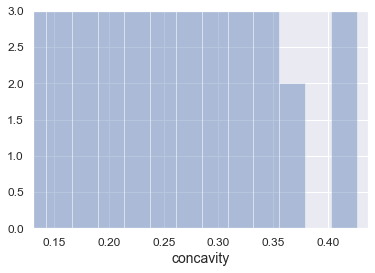

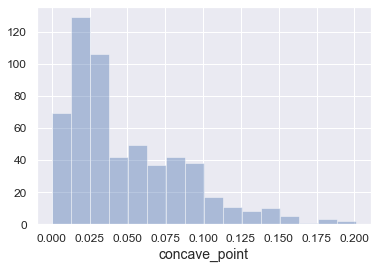

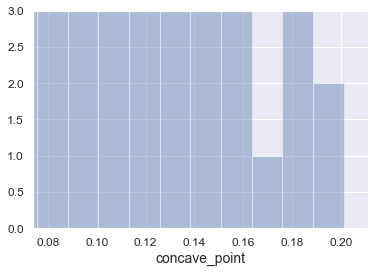

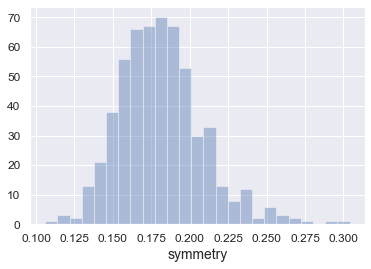

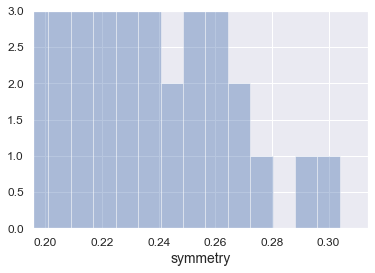

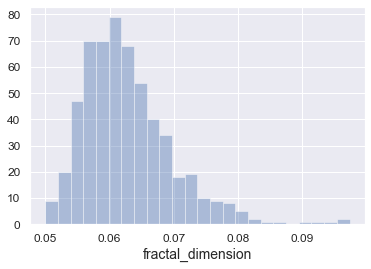

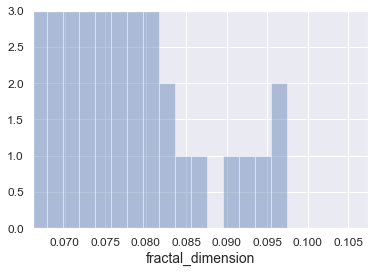

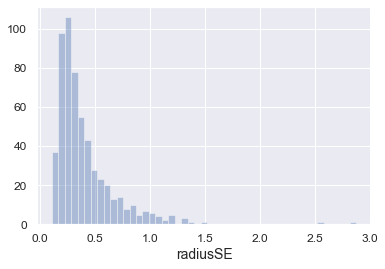

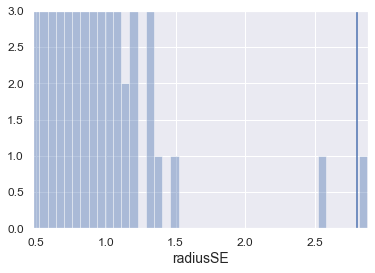

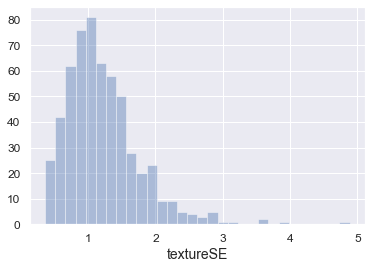

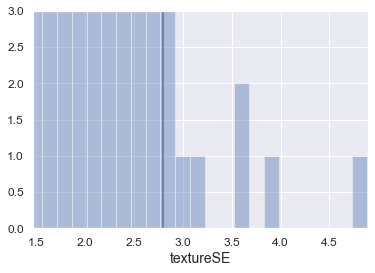

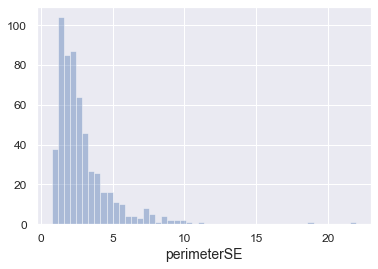

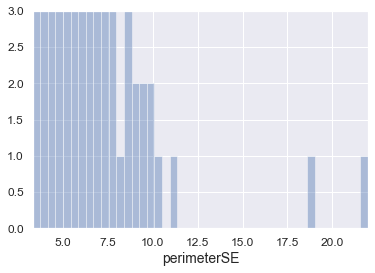

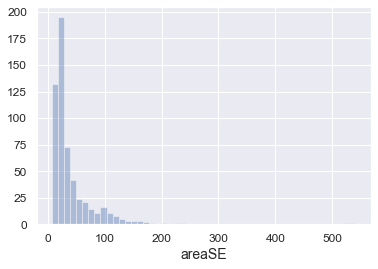

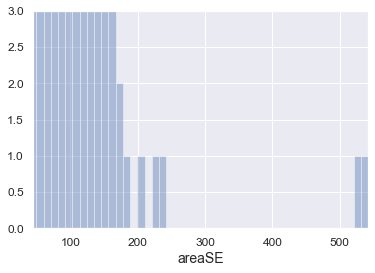

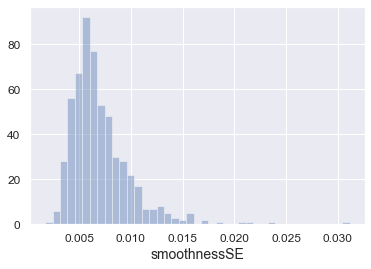

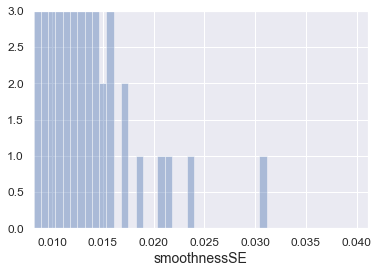

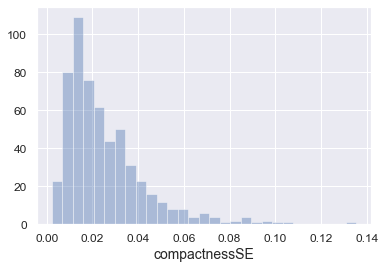

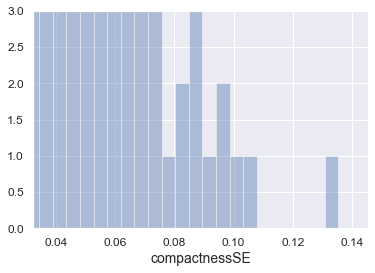

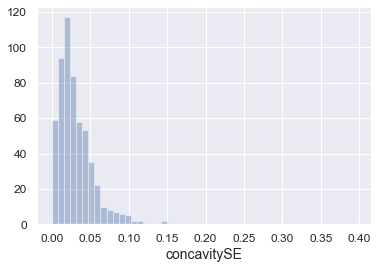

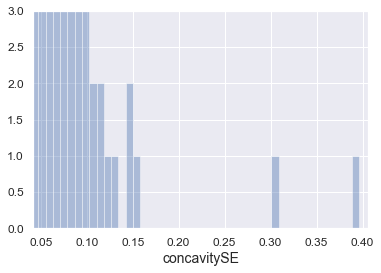

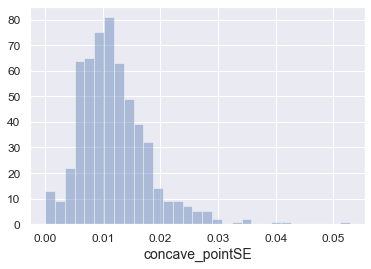

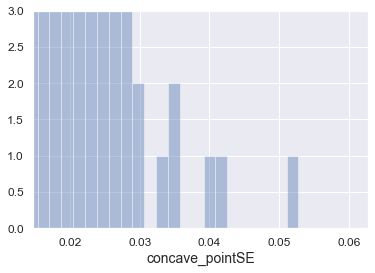

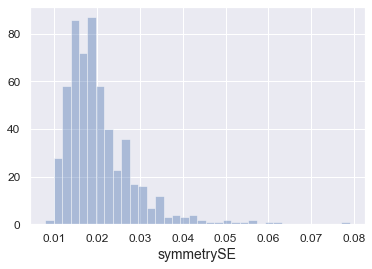

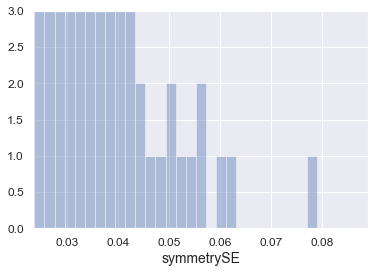

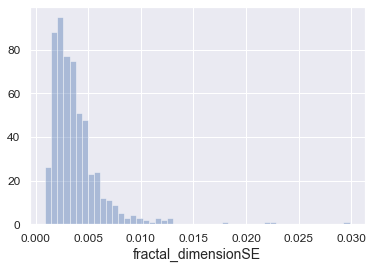

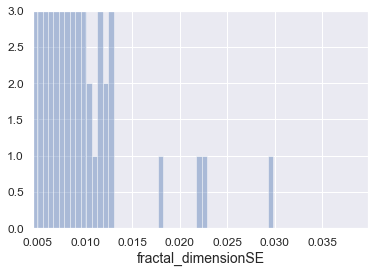

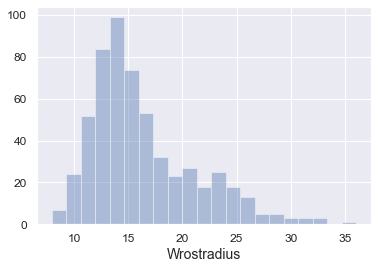

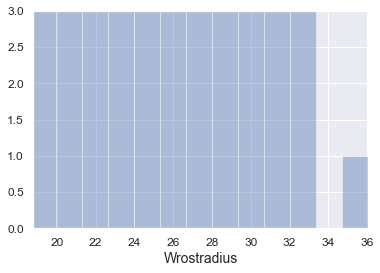

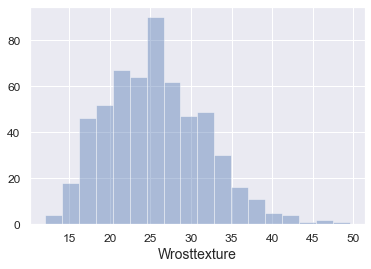

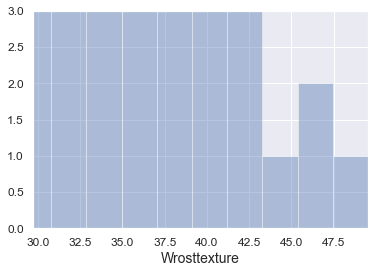

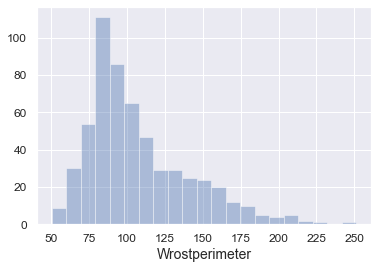

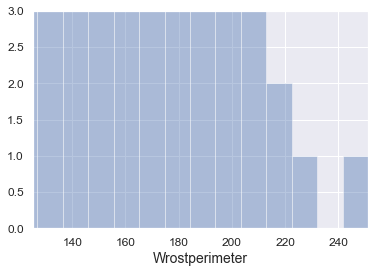

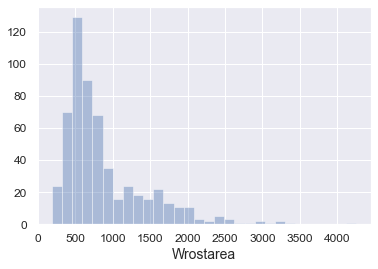

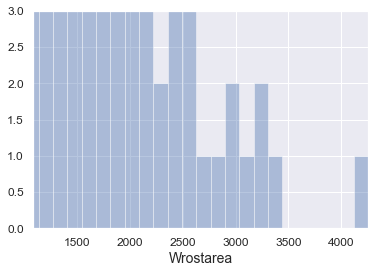

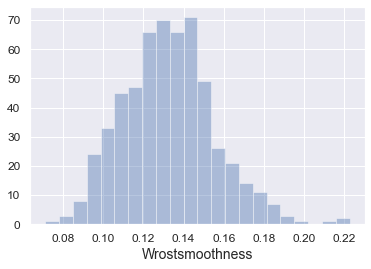

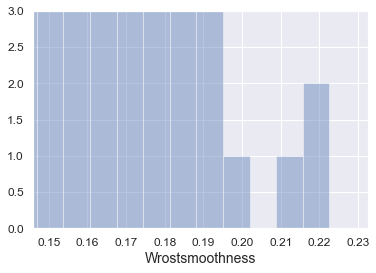

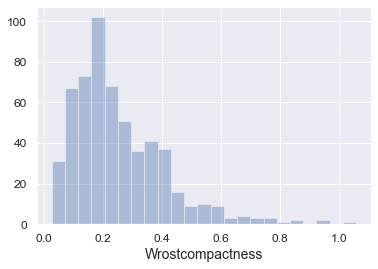

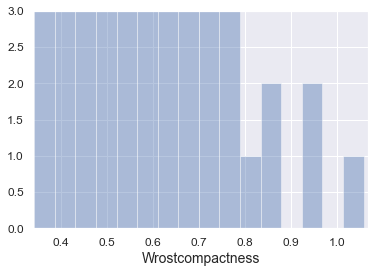

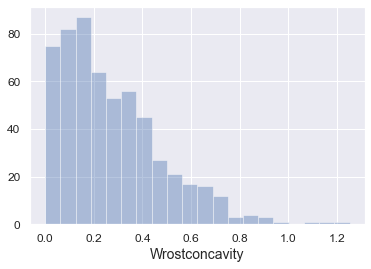

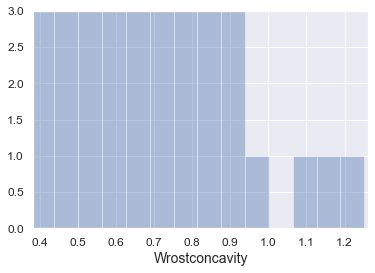

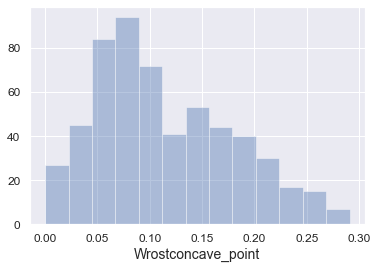

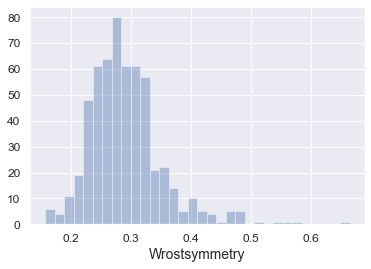

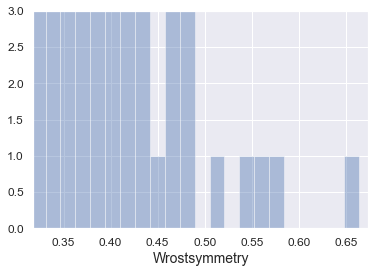

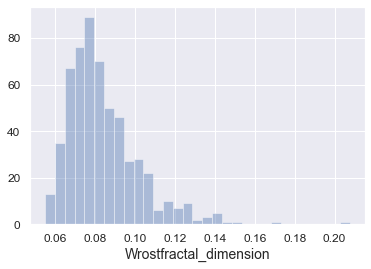

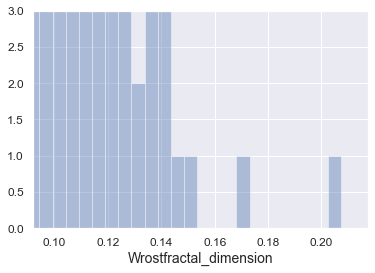

In [327]:
import warnings
warnings.filterwarnings("ignore")

for i in range(len(df. columns)):
    col = (i-2) % 4
    row = (i-2) // 4
    sns.distplot(df.iloc[:,i],kde=False)
    plt.show()
    if sum(df.iloc[:,i]>(df.iloc[:,i].quantile(0.75)*2.5 - df.iloc[:,i].quantile(0.25)*1.5)) > 0:
        sns.distplot(df.iloc[:,i],kde=False)
        plt.ylim(0,3)
        plt.xlim(df.iloc[:,i].quantile(0.75),df.iloc[:,i].max()+0.01)
        plt.axvline(2.8, 0,df.iloc[:,i].mean()+1.5*(df.iloc[:,i].max()-df.iloc[:,i].min()))
        plt.show()

<Figure size 432x288 with 0 Axes>

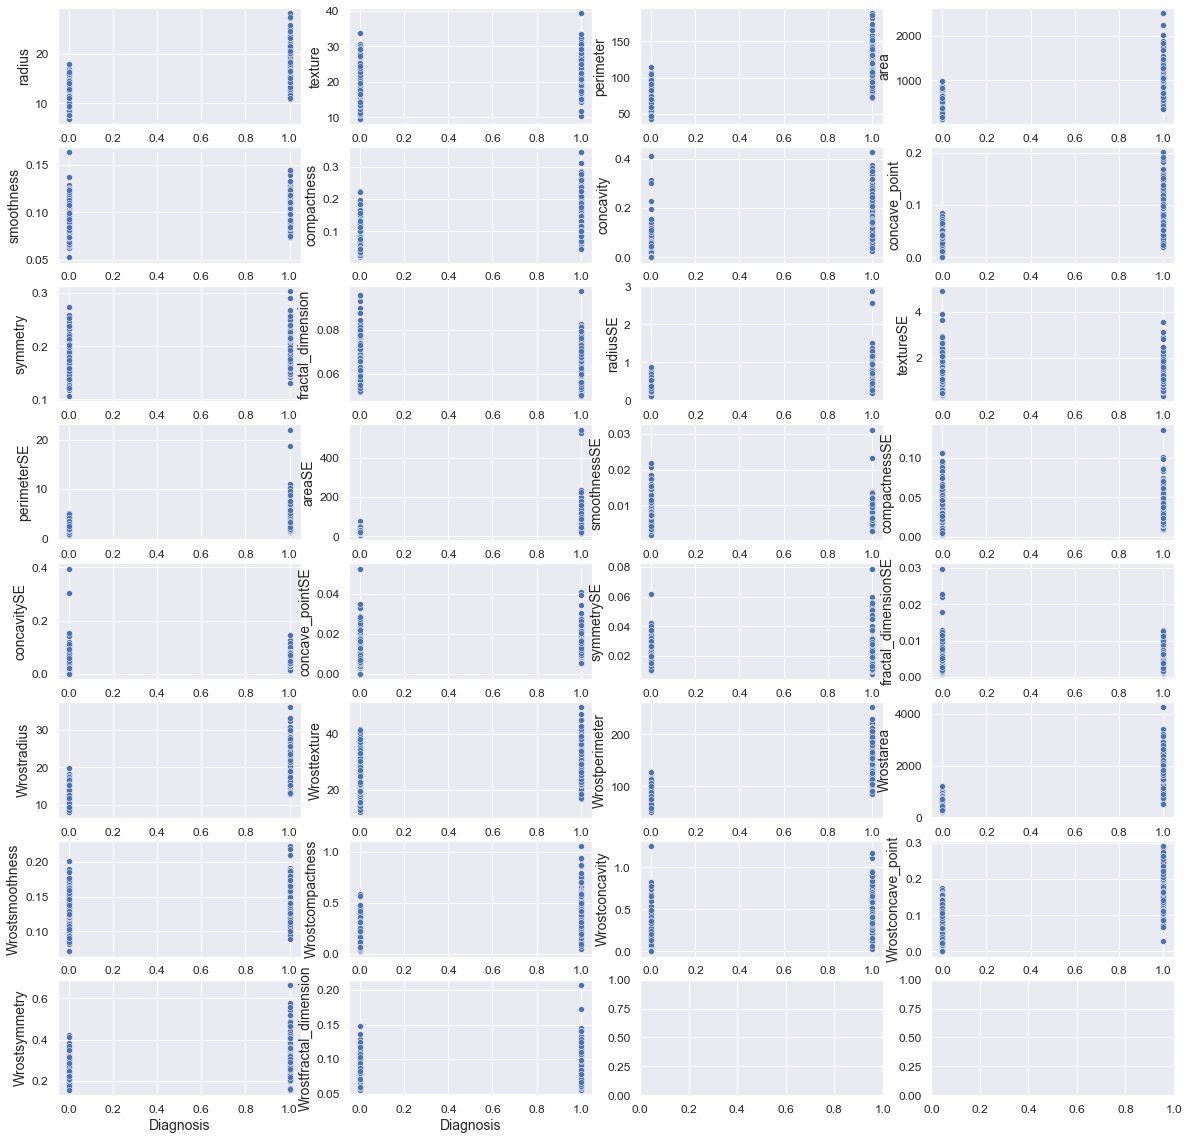

In [328]:
plt.tight_layout()

num = range(2,len(df.columns))
fig, axes = plt.subplots(8,4,figsize=[20,20])
for i in num:
    col = (i-2) % 4
    row = (i-2) // 4
    sns.scatterplot("Diagnosis",df.columns[i],data = df, ax=axes[row,col])

# Predictive Modeling

In [330]:
y = df.iloc[:,1]
y = y.to_frame()
X = df.iloc[:,2:]

In [331]:
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

np.random.seed(42) # Ensure reproducability

In [332]:
from sklearn.model_selection import train_test_split

#Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [337]:
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

## Decision Tree

In [370]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'min_samples_leaf': list(range(1, 30)),
                              'max_depth': list(range(3, 11)),
                             "criterion": ["gini","entropy"]}],
                  scoring='f1_macro', # Specifying multiple metrics for evaluation
                  cv=inner_cv)

In [371]:
gs_dt = gs.fit(X,y)

In [372]:
print("\n Parameter Tuning #1")
print("Non-nested CV f1_macro: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


 Parameter Tuning #1
Non-nested CV f1_macro:  0.9546228099297324
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}
Optimal Estimator:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=42)
Nested CV f1_macro:  0.9358106154761549  +/-  0.02102737853698179


## Logistic

In [343]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [373]:
gs = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000],
                              "penalty":["l2","l1"], 'solver' : ['liblinear','saga']}],
                  scoring='f1_macro',
                  cv=inner_cv)

In [374]:
gs_lr = gs.fit(X,y)

In [375]:
print("\n Parameter Tuning #2")
print("Non-nested CV f1_macro: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


 Parameter Tuning #2
Non-nested CV f1_macro:  0.9661594539900953
Optimal Parameter:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Optimal Estimator:  LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
Nested CV f1_macro: 0.9458561807238033  +/-  0.0336060096841347


## KNN

In [347]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [376]:
gs = GridSearchCV(estimator=neighbors.KNeighborsClassifier(metric='minkowski'),
                  param_grid=[{'n_neighbors': list(range(1, 21)),
                              "p": [1,2],
                              'weights':['uniform','distance']}],
                  scoring='f1_macro',
                  cv=inner_cv)

In [377]:
gs_knn = gs.fit(X_std,y)

In [378]:
print("\n Parameter Tuning #3")
print("Non-nested CV f1_macro: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_std, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 Parameter Tuning #3
Non-nested CV f1_macro:  0.9696104312219758
Optimal Parameter:  {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=8, weights='distance')
Nested CV f1_macro:  0.9635898901904698  +/-  0.009706404783664106


### Based on the performance score reported, Logistic model is the best out of all. Since the problem is diagnose of cancer (M/B), I believe that recall(M) is the most important metrics here. Because it can get extremely risky and costly to miss a true malignant, which may risk a person’s life. By having a high recall score, we can make sure that we don’t make as less as possible mispredictions of true malignant, which can delay a patient’s treatment and reduce its chance of recovery. So for here, the logistic regression had a highest recall of 100% on malignant, thus, logistic model presents as the best model here.

# Learning Curve

In [358]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, score = "accuracy",
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = score)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

In [359]:
# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt

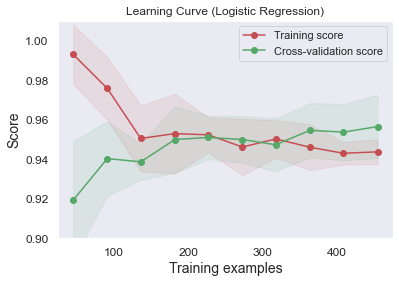

In [379]:
np.random.seed(42)

title = "Learning Curve (Logistic Regression)"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = LogisticRegression() # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.9, 1.01), cv=cv, n_jobs=4, score = "f1_macro")

plt.show() # Display the figure

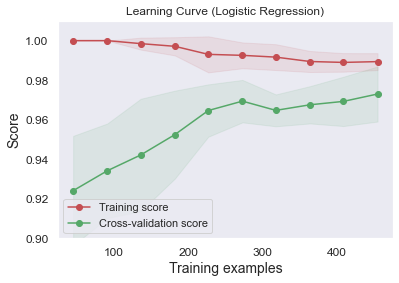

In [380]:
np.random.seed(42)

title = "Learning Curve (Logistic Regression)"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = LogisticRegression(random_state=42, solver='liblinear',C = 100, penalty = 'l1') # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.9, 1.01), cv=cv, n_jobs=4, score = "f1_macro")

plt.show() # Display the figure

## Fitting curve

In [381]:
# Fitting curve (aka validation curve)
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve
# Split validation
from sklearn.model_selection import train_test_split

np.random.seed(42) #the seed used by the random number generator for np

In [413]:
param_range=list(range(1, 15))

In [414]:
x_train_std = sc.transform(x_train) # Perform standardization of train set X by centering and scaling
x_test_std = sc.transform(x_test) # Perform standardization of test set X by centering and scaling

In [415]:
# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=42), #Build Logistic Regression Models
                X=x_train, 
                y=y_train, 
                param_name="max_depth", 
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="f1_macro", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

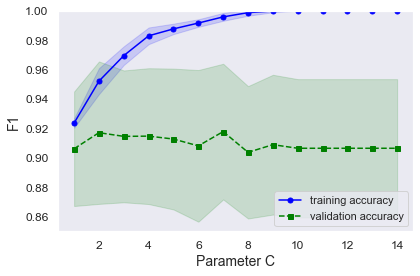

In [416]:
# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('F1')
plt.ylim([0.85, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

# ROC

In [253]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [397]:
clf1 = LogisticRegression(penalty='l1', 
                          C=100,
                          random_state=42, 
                          solver='liblinear') 

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=5,
                              criterion='gini',
                              min_samples_leaf = 6,
                              random_state=42)

# kNN Classifier
clf3 = KNeighborsClassifier(n_neighbors=8,
                            p=2,
                            metric='minkowski',
                           weights = "distance")

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

In [398]:
print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.99 (+/- 0.01) [Logistic regression]
ROC AUC: 0.96 (+/- 0.03) [Decision tree]
ROC AUC: 0.97 (+/- 0.02) [kNN]


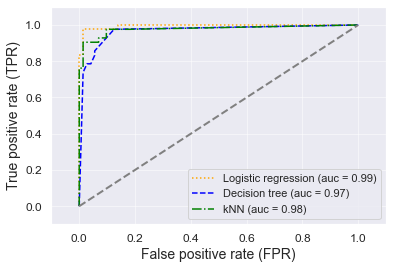

In [399]:
colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()